In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
import glob
import geopandas as gp
import plotly.graph_objects as go
import plotly.express as px
plt.rcParams['figure.figsize'] = (9,12)
plt.rcParams['figure.facecolor']='w'
plt.rcParams['font.family'] = 'serif'
import warnings
warnings.filterwarnings('ignore')

In [2]:
chicago_shp = '../data_misc/chicago_shapefile/geo_export_ec346dbb-8c11-44b4-be04-0301ae3f9c64.shp'
chicago = gp.read_file(chicago_shp)
chicago.geoid10 = chicago.geoid10.apply(np.int64)
chicago = chicago[['geoid10', 'geometry']]

In [3]:
chicago.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot:>

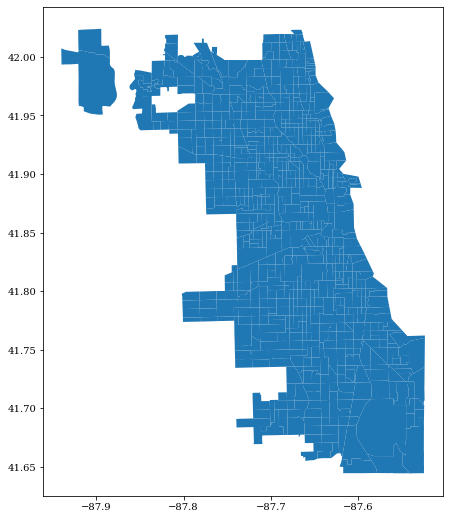

In [4]:
chicago.plot()

In [5]:
ejscreen = gp.read_file('EJC_Calculation/ECJ_Through_Calculations_v1/EJC_Through_Calculation.shp')
ejscreen.rename(columns={'GEOID_1':'geoid10'},inplace=True)

In [6]:
ejscreen.geoid10 = ejscreen.geoid10.apply(np.int64)

In [7]:
print(ejscreen.crs)
ejscreen.to_crs(4326, inplace=True)
ejscreen.crs

PROJCS["WGS_1984_Web_Mercator_Auxiliary_Sphere",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433],AUTHORITY["EPSG","4326"]],PROJECTION["Mercator_1SP"],PARAMETER["central_meridian",0],PARAMETER["scale_factor",1],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["Meter",1],AXIS["Easting",EAST],AXIS["Northing",NORTH],EXTENSION["PROJ4","+proj=merc +a=6378137 +b=6378137 +lat_ts=0 +lon_0=0 +x_0=0 +y_0=0 +k=1 +units=m +nadgrids=@null +wktext +no_defs"]]


<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot:>

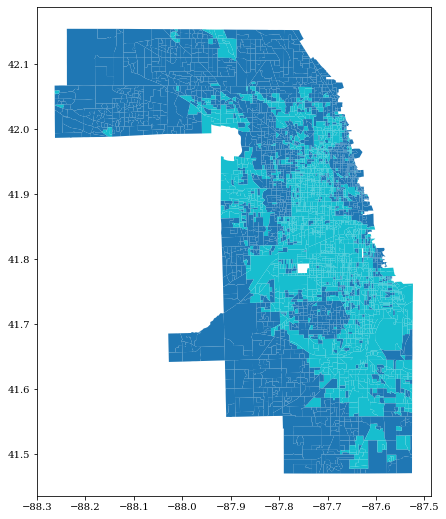

In [8]:
ejscreen[ejscreen['County_1']=='COOK'].plot(column='EJC_byCalc')

In [9]:
chicago = pd.merge(chicago, ejscreen, on=['geoid10','geometry'], how='left')


In [10]:
ejscreen.geoid10.values == chicago.geoid10.values

False

(-87.9, -87.5)

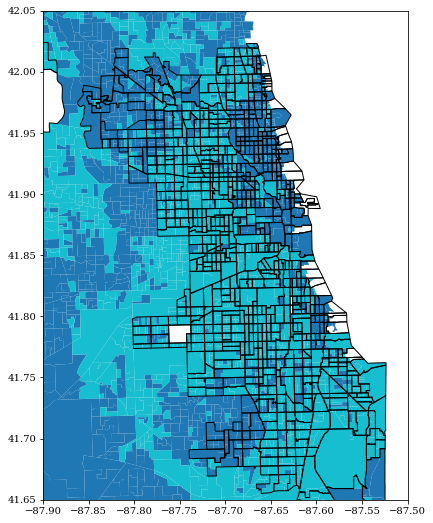

In [11]:
fig, ax = plt.subplots()
ejscreen[ejscreen['County_1']=='COOK'].plot(column='EJC_byCalc', ax=ax)
chicago.plot(ax=ax, edgecolor='k', facecolor='None')
ax.set_ylim(41.65, 42.05)
ax.set_xlim(-87.9, -87.5)

In [12]:
chicago_overlay = gp.overlay(ejscreen,chicago, how='intersection')
chicago_overlay

,geoid10_1,County_1_1,EJC_byCalc_1,geoid10_2,County_1_2,EJC_byCalc_2,geometry
0,170312312001,COOK,Yes,17031230700,None,None,"POLYGON ((-87.72022 41.90273, -87.71998 41.902..."
1,170312307002,COOK,Yes,17031230700,None,None,"POLYGON ((-87.72155 41.90633, -87.72131 41.906..."
2,170312312004,COOK,Yes,17031230700,None,None,"POLYGON ((-87.72387 41.90270, -87.72363 41.902..."
3,170312312005,COOK,Yes,17031230700,None,None,"POLYGON ((-87.72630 41.90268, -87.72611 41.902..."
4,170312303001,COOK,Yes,17031230700,None,None,"POLYGON ((-87.71670 41.91000, -87.71671 41.910..."
...,...,...,...,...,...,...,...
5976,170310622002,COOK,No,17031062300,None,None,"POLYGON ((-87.65897 41.93985, -87.65897 41.939..."
5977,170310623001,COOK,No,17031062300,None,None,"POLYGON ((-87.65908 41.94349, -87.65907 41.943..."
5978,170310628001,COOK,No,17031062300,None,None,"POLYGON ((-87.66109 41.93980, -87.66109 41.939..."
5979,170310628003,COOK,No,17031062300,None,None,"POLYGON ((-87.66382 41.93977, -87.66334 41.939..."


In [38]:
import matplotlib

cmap_civid = matplotlib.cm.get_cmap('cividis')

rgba = cmap(1)
print(rgba) # (0.99807766255210428, 0.99923106502084169, 0.74602077638401709, 1.0)

(0.0, 0.138068, 0.311105, 1.0)


In [40]:
from mycolorpy import colorlist as mcp
N_regions = 2
color1=mcp.gen_color(cmap="cividis",n=N_regions)
color1

['#00224e', '#fee838']

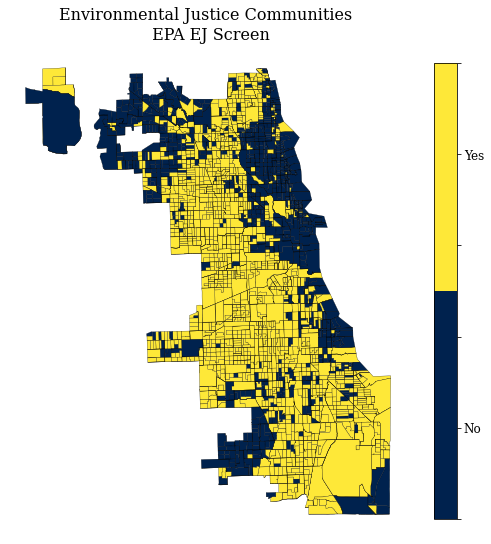

In [45]:
import matplotlib.colors as colors
fig, ax = plt.subplots(figsize=(9,12))
# norm = colors.Normalize(vmin=0, vmax=1000)



cmap = colors.ListedColormap([color1[0], color1[1]])
cbar = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
chicago_overlay.plot(ax=ax, edgecolor='k',column='EJC_byCalc_1', norm=norm, cmap=cmap, legend=False, lw=0.25)
ax_cbar = fig.colorbar(cbar, ax=ax, shrink=0.7)
ax_cbar.ax.set_yticklabels(['','No','','','Yes'], fontsize=12) 
# ax_cbar.set_label(r'Number of crimes per census tract', fontsize=16)
# counties.centroid.plot(ax=ax, color='tab:red')
ax.set_title('Environmental Justice Communities \n EPA EJ Screen', fontsize=16)
ax.set_axis_off()
plt.savefig('../chicago-solar/paper/figures/ejscreen_map.eps', format='eps')

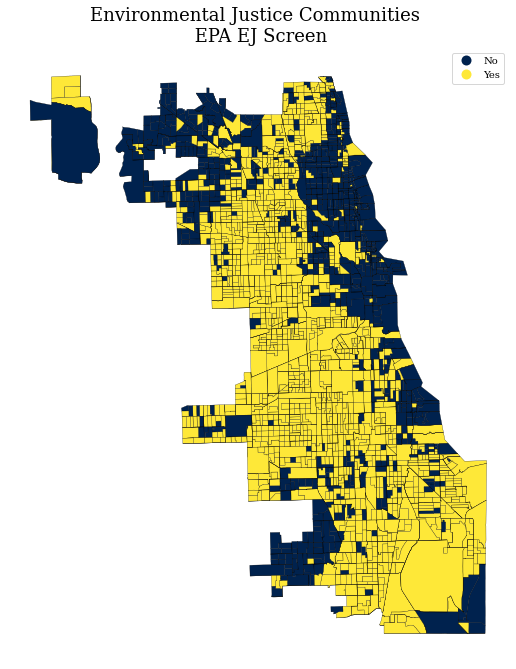

In [44]:
ax = chicago_overlay.plot(column='EJC_byCalc_1', edgecolor='k', lw=0.25, cmap='cividis', legend=True)
ax.set_title('Environmental Justice Communities \n EPA EJ Screen', fontsize=18)
ax.set_axis_off()
# plt.savefig('../chicago-solar/paper/figures/ejscreen_map.eps', format='eps')

In [15]:
cjest = gp.read_file('USA_CEJST/usa.shp')
cjest.head()

,GEOID10,SF,CF,DF_PFS,AF_PFS,HDF_PFS,DSF_PFS,EBF_PFS,EALR_PFS,EBLR_PFS,...,M_HSG_EOMI,M_PLN_EOMI,M_WTR_EOMI,M_HLTH_EOM,M_WKFC_EOM,M_WKFC_EBS,M_EBSI,UI_EXP,THRHLD,geometry
0,27139080202,Minnesota,Scott County,0.04,0.07,0.03,0.44,0.00,0.38,0.78,...,0,0,0,0,0,0,0,Nation,21,"POLYGON ((-93.39902 44.74655, -93.39902 44.747..."
1,27139080204,Minnesota,Scott County,0.04,0.16,0.06,0.38,0.01,0.36,0.78,...,0,0,0,0,0,0,0,Nation,21,"POLYGON ((-93.38203 44.73933, -93.38158 44.739..."
2,27139080100,Minnesota,Scott County,0.44,0.35,0.57,0.49,0.06,0.47,0.84,...,0,0,0,0,0,1,0,Nation,21,"POLYGON ((-93.34248 44.78788, -93.34183 44.787..."
3,27139080302,Minnesota,Scott County,0.02,0.14,0.03,0.38,0.02,0.57,0.78,...,0,0,0,0,0,0,0,Nation,21,"POLYGON ((-93.52073 44.72061, -93.52073 44.721..."
4,27139080400,Minnesota,Scott County,0.33,0.52,0.39,0.40,0.08,0.38,0.80,...,0,0,0,0,0,1,0,Nation,21,"POLYGON ((-93.51900 44.80250, -93.51732 44.803..."


In [16]:
chicago_overlay_cj = gp.overlay(cjest,chicago, how='intersection')
chicago_overlay_cj

,GEOID10,SF,CF,DF_PFS,AF_PFS,HDF_PFS,DSF_PFS,EBF_PFS,EALR_PFS,EBLR_PFS,...,M_HLTH_EOM,M_WKFC_EOM,M_WKFC_EBS,M_EBSI,UI_EXP,THRHLD,geoid10,County_1,EJC_byCalc,geometry
0,17043840000,Illinois,DuPage County,0.56,0.14,0.29,0.90,0.30,0.04,0.52,...,0,1,1,1,Nation,21,17031980000,None,None,"MULTIPOLYGON (((-87.92024 41.95945, -87.92017 ..."
1,17031770602,Illinois,Cook County,0.55,0.24,0.59,0.93,0.24,0.00,0.41,...,0,1,1,0,Nation,21,17031980000,None,None,"MULTIPOLYGON (((-87.88454 41.99896, -87.88519 ..."
2,17031806600,Illinois,Cook County,0.30,0.20,0.35,0.96,0.30,0.00,0.33,...,0,0,1,0,Nation,21,17031980000,None,None,"MULTIPOLYGON (((-87.88453 41.99822, -87.88453 ..."
3,17031811600,Illinois,Cook County,0.38,0.37,0.39,0.95,0.38,0.00,0.66,...,0,1,1,0,Nation,21,17031980000,None,None,"MULTIPOLYGON (((-87.88548 41.95763, -87.88481 ..."
4,17031811701,Illinois,Cook County,0.53,0.29,0.33,0.95,0.24,0.00,0.68,...,0,1,1,1,Nation,21,17031980000,None,None,"MULTIPOLYGON (((-87.89743 41.95066, -87.89716 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5148,17031063000,Illinois,Cook County,0.00,0.06,0.00,0.98,0.00,0.00,0.31,...,0,0,0,0,Nation,21,17031070300,None,None,"MULTIPOLYGON (((-87.65382 41.93264, -87.65386 ..."
5149,17031070200,Illinois,Cook County,0.00,0.10,0.01,0.98,0.01,0.00,0.31,...,1,0,0,0,Nation,21,17031070300,None,None,"MULTIPOLYGON (((-87.64877 41.92563, -87.64877 ..."
5150,17031070300,Illinois,Cook County,0.00,0.07,0.00,0.98,0.00,0.00,0.30,...,0,0,0,0,Nation,21,17031070300,None,None,"POLYGON ((-87.65367 41.92719, -87.65367 41.927..."
5151,17031070400,Illinois,Cook County,0.03,0.18,0.06,0.98,0.01,0.00,0.31,...,0,0,0,0,Nation,21,17031070300,None,None,"MULTIPOLYGON (((-87.65363 41.92606, -87.65363 ..."


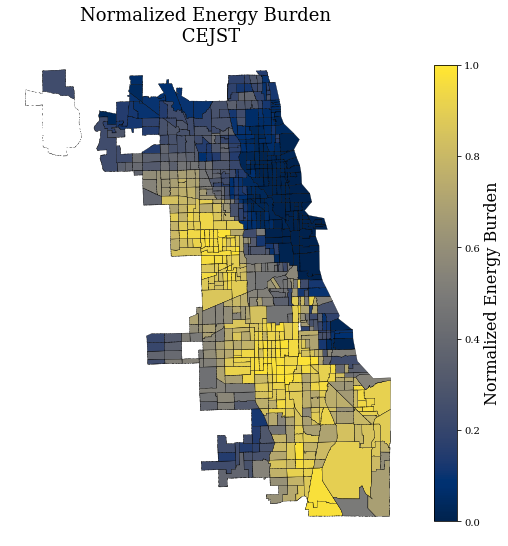

In [24]:
# ax = chicago_overlay_cj.plot(column='EBF_PFS',edgecolor='k', lw=0.25, cmap='plasma_r', legend=True)
# ax.set_title('Energy Burden')
# ax.set_axis_off()

import matplotlib.colors as colors
fig, ax = plt.subplots(figsize=(9,12))
norm = colors.Normalize(vmin=0, vmax=1)
cmap = 'cividis'
cbar = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
# chicago_overlay_cj.plot(ax=ax, color='w',edgecolor='k', legend=False, column)
chicago_overlay_cj.plot(ax=ax, edgecolor='k',column='EBF_PFS', norm=norm, cmap=cmap, legend=False, lw=0.25)
ax_cbar = fig.colorbar(cbar, ax=ax, shrink=0.7)
ax_cbar.set_label(r'Normalized Energy Burden', fontsize=16)
# counties.centroid.plot(ax=ax, color='tab:red')
ax.set_title('Normalized Energy Burden \n CEJST', fontsize=16)
ax.set_axis_off()
plt.savefig('../chicago-solar/paper/figures/cejst_map.eps', format='eps')